In [ ]:
# Giới thiệu 2 giải thuật tìm kiếm đường đi ngắn nhất trong đồ thị
# Dijkstra và Bellman-Ford

In [23]:
# Giải thuật Dijkstra
# Đầu vào: Đồ thị có trọng số, đỉnh bắt đầu
# Đầu ra: Đường đi ngắn nhất từ đỉnh bắt đầu đến các đỉnh còn lại
# Độ phức tạp: O(V^2) với V là số đỉnh
# Độ phức tạp: O(E + VlogV) với E là số cạnh, V là số đỉnh
# Điều kiện: Không có cạnh âm
import math
import matplotlib.pyplot as plt
import networkx as nx
import pydot as dot
import pygraphviz as pgv
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

{('u', 'v'): Text(147.32049999999998, 18.0, '2'),
 ('u', 'x'): Text(57.0805, 70.1, '1'),
 ('u', 'w'): Text(87.161, 122.2, '5'),
 ('v', 'x'): Text(117.24, 70.1, '2'),
 ('v', 'w'): Text(147.32049999999998, 122.2, '3'),
 ('x', 'w'): Text(57.0805, 174.3, '3'),
 ('x', 'y'): Text(117.24, 174.3, '1'),
 ('w', 'y'): Text(147.32049999999998, 226.4, '1'),
 ('w', 'z'): Text(177.4005, 174.3, '5'),
 ('y', 'z'): Text(237.56, 174.3, '2')}

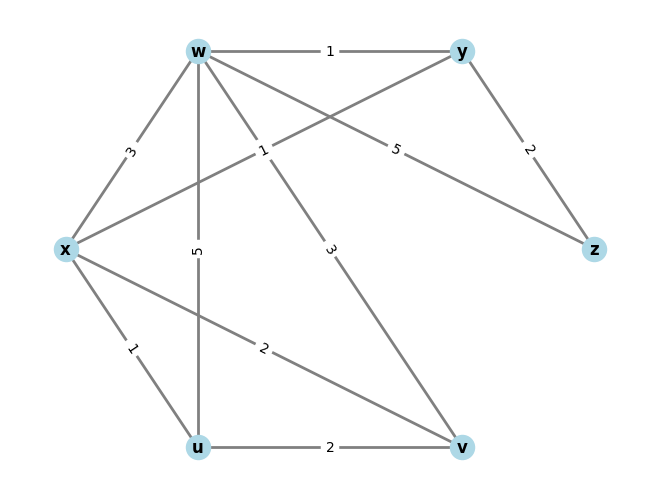

In [59]:
# Đồ thị có trọng số
# graph = {
#     'u': {'v': {'weight': 1}, 'x': {'weight': 2}},
#     'B': {'C': {'weight': 2}, 'D': {'weight': 5}},
#     'C': {'D': {'weight': 1}},
#     'D': {}
# }
myGraph = nx.Graph()
myGraph.add_nodes_from(['u', 'v', 'x', 'w', 'y', 'z'])
myGraph.add_weighted_edges_from([('u', 'v', 2), ('u', 'x', 1), ('u', 'w', 5),
                                ('v', 'x', 2), ('v', 'w', 3),
                                ('x', 'w', 3), ('x', 'y', 1), ('w', 'y', 1),
                                ('w', 'z', 5), ('y', 'z', 2)])
pos = nx.nx_agraph.graphviz_layout(myGraph, prog='circo')
labels = nx.get_edge_attributes(myGraph, 'weight')
nx.draw(myGraph,pos,with_labels=True, node_color='lightblue', edge_color='grey', width=2, 
        edge_cmap=plt.cm.Blues, font_weight='bold')
nx.draw_networkx_edge_labels(myGraph,pos,edge_labels=labels) 
# labels
# m.edge_attr.items.
# m.draw('graph.png', format='png', prog='circo')
# m.write('graph.dot')
# myGraph = dot.graph_from_dot_file('graph.dot')
# myGraph = myGraph[0]
# myGraph.write_png('graph.png', prog='circo')

Ta có:
    Tập đỉnh: V = {1, 2, 3, ..., n}
    Tập cạnh: E = {(u, v) | u, v thuộc V}
    Chi phí c(u, v) là chi phí của cạnh (u, v)
    Chi phí d(v) là chi phí hiện thời từ đỉnh nguồn đến đỉnh đích v.
    p(v) là đỉnh trước v trên đường đi ngắn nhất từ đỉnh nguồn đến v.
    T: tập các đỉnh đã xét.

Giải thuật Dijkstra:
Các thủ tục:
    Init:
        d(s) = 0
        ∀ v ∈ V, v != s, d(v) = +inf, p(v) = NULL
        T = {}
    Dijkstra:
        do:
            u = u ∈ V | d(u) min.
            T = T ∪ {u}
            for neighbor v of u:
                if d(v) > d(u) + c(u, v):
                    d(v) = d(u) + c(u, v)
                    p(v) = u
        while T != V

In [2]:
class Edge:
    def __init__(self, u: str, v: str, dr : bool = False):
        self.u = u
        self.v = v
        self.dr = dr
    def __hash__(self) -> int:
        if self.dr:
            return hash((self.u, self.v, self.dr))
        return hash((self.u, self.v)) if self.u < self.v else hash((self.v, self.u))
    def __eq__(self, o: object) -> bool:
        if not isinstance(o, Edge) or self.dr != o.dr:
            return False
        if self.u == o.u and self.v == o.v:
            return True
        if self.u == o.v and self.v == o.u:
            return True
        return False
    def __str__(self) -> str:
        if self.dr:
            return f'{self.u} -> {self.v}' 
        return f'{self.u} -- {self.v}'
    def __repr__(self) -> str:
        return self.__str__()

In [3]:
def drawGraph(node, S: set, c: dict):
    SPT = nx.Graph()
    SPT.add_nodes_from(node)
    for e,w in c.items():
        color = 'red' if e in S  else 'grey'
        SPT.add_edge(e.u,e.v,weight = w,color = color)
    pos = nx.nx_agraph.graphviz_layout(SPT, prog='circo')
    labels = nx.get_edge_attributes(SPT, 'weight')
    colors = nx.get_edge_attributes(SPT, 'color')
    nx.draw(SPT,pos,with_labels=True, node_color='lightblue', edge_color=colors.values(), width=2, 
        edge_cmap=plt.cm.Blues, font_weight='bold'
        )
    nx.draw_networkx_edge_labels(SPT,pos,edge_labels=labels,label_pos=0.4)

In [4]:
V = {'u', 'v', 'x', 'w', 'y', 'z'}
E = {Edge('u','v'), Edge('u','x'), Edge('u','w'), Edge('v','x'), 
     Edge('v','w'), Edge('x','w'), Edge('x','y'), Edge('w','y'), 
     Edge('w','z'), Edge('y','z')}
w = {Edge('u','v'):2, Edge('u','x'):1, Edge('u','w'):5, Edge('v','x'):2, 
     Edge('v','w'):3, Edge('x','w'):3, Edge('x','y'):1, Edge('w','y'):1, 
     Edge('w','z'):5, Edge('y','z'):2}
def c(u,v) -> int:
     if u == v:
         return 0
     return w[Edge(u,v)] if Edge(u,v) in w else math.inf

In [61]:
# Dijkstra
def dijkstra(V: set, E: set, c, u):
    d = {}
    p = {}
    d[u] = 0
    for v in V:
        if v != u:
            d[v] = math.inf
            p[v] = None
    T = set()
    while len(T) < len(V):
        w = min(V - T, key=d.get)
        T.add(w)
        for v in V - T:
            if d[v] > d[w] + c(w,v):
                d[v] = d[w] + c(w,v)
                p[v] = w
    return d, p
d,p = dijkstra(V, E, c, 'u')
S = [Edge(n,m) for n,m in p.items()]
S

[z -- y, w -- y, y -- x, v -- u, x -- u]

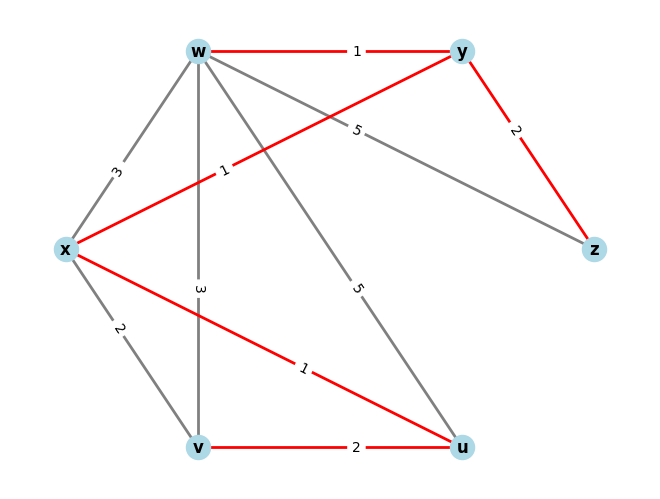

In [62]:
drawGraph(V, S, w)

Giải thuật Bellman-Ford:
    Init:
        d(s) = 0
        ∀ v ∈ V, v != s, d(v) = +inf, p(v) = NULL
    Bellman-Ford:
        for each u ∈ V:
            for each (u, v) ∈ E:
                if d(v) > d(u) + c(u, v):
                    d(v) = d(u) + c(u, v)
                    p(v) = u
        for each (u, v) ∈ E:
            if d(v) > d(u) + c(u, v):
                return false
        return true

In [129]:
# Bellman-Ford
def BellmanFord(V: set, E: set[Edge], c, s):
    d = {}
    d[s] = {}
    for v in V:
        d[s][v] = c(s,v)
    for u in V - {s}:
        for v in V:
            if d[s][v] > d[s][u] + c(u,v):
                d[s][v] = d[s][u] + c(u,v)
    # for e in E:
    #     if d[e.v] > d[e.u] + c[e]:
    #         return False
    return d, p
d,p = BellmanFord(V, E, c,'u')
S = [Edge(n,m) for n,m in p.items()]


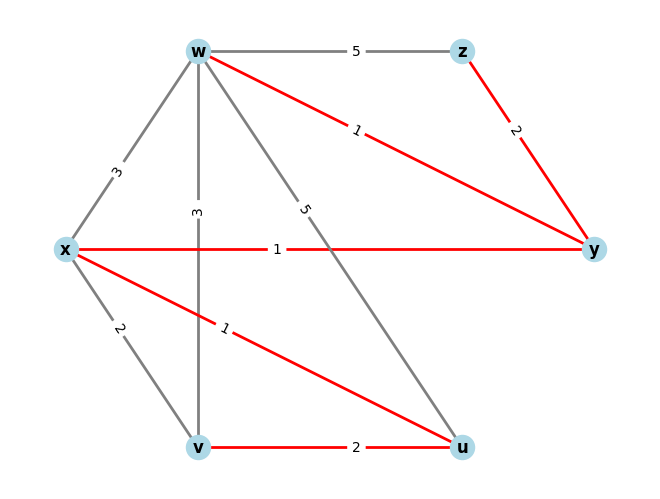

In [131]:
drawGraph(V, S, w)

Vậy trong Distance-vector routing, các router sẽ hoạt đột như thế nào?
- Mỗi router gửi thông tin đến các router khác thông qua các gói tin.
- Mỗi router sẽ cập nhật bảng định tuyến của mình dựa trên thông tin nhận được từ các router khác bằng cách sử dụng giải thuật Bellman-Ford.
    Giả sử:
    A -- B: 2
    A -- C: 8
    B -- C: 1
    Ban đầu, các bản định tuyến của các router như sau:
        A: {A: 0, B: 2, C: 8}
        B: {A: 2, B: 0, C: 1}
        C: {A: 8, B: 1, C: 0}
    Sau khi A nhận được thông tin từ B và C:
        A: {A: 0, B: 2, C: 3} (Cập nhật thông tin từ C hoặc B, tùy thuộc vào thứ tự nhận thông tin từ C và B)
        B: {A: 2, B: 0, C: 1}
        C: {A: 3, B: 1, C: 0}
    Sau khi B nhận được thông tin từ A và C:
        A: {A: 0, B: 2, C: 3}
        B: {A: 2, B: 0, C: 1} (Vẫn giữ nguyên vì thông tin không tốt hơn thông tin hiện tại)
        C: {A: 3, B: 1, C: 0}
    Sau khi C nhận được thông tin từ A và B:
        A: {A: 0, B: 2, C: 3}
        B: {A: 2, B: 0, C: 1} 
        C: {A: 3, B: 1, C: 0} (Vẫn giữ nguyên vì thông tin không tốt hơn thông tin hiện tại)
- Mỗi router sẽ gửi thông tin đến các router khác sau một khoảng thời gian nhất định.
- Khi có sự thay đổi về đường đi, router sẽ gửi thông tin đến các router khác để cập nhật bảng định tuyến.



In [165]:

class Router:
    def __init__(self,name: str, c):
        self.name = name
        self.c = c
        self.d = {}
        self.d[self.name] = 0
        self.route = {}
        
    def Update(self, data: tuple):
        v, cv = data[0]
        d = data[1]
        for x,cvx in d.items():
            if self.d.get(x,math.inf) > cvx + cv:
                self.d[x] = cvx + cv
                self.route[x] = v
    
    def Listen(self, data: tuple):
        self.Update(data)
    def Send(self, e: 'Router'):
        msg = ((self.name,self.c(self.name,e.name)), self.d)
        e.Listen(msg)
    def Check(self, E: set[Edge]):
        for v in self.route.copy():
            if Edge(self.name, self.route[v]) not in E:
                self.route.pop(v)
                self.d.pop(v)

In [166]:
Ru = Router('u', c)
Rv = Router('v', c)
Rx = Router('x', c)
Rw = Router('w', c)
Ry = Router('y', c)
Rz = Router('z', c)


In [167]:
listR = [Ru, Rv, Rx, Rw, Ry, Rz]
for r in listR:
    print(r.name, r.d, r.route)

u {'u': 0} {}
v {'v': 0} {}
x {'x': 0} {}
w {'w': 0} {}
y {'y': 0} {}
z {'z': 0} {}


In [180]:
import threading


eE = E  - {Edge('x','y')}
for r in listR:
    for v in listR:
        if Edge(r.name, v.name) in eE:
            r.Send(v)
            r.Check(eE)
t = threading.Thread(target=Ru.Send, args=(Rv,))
t.start()
            

In [107]:
Rx.Send(Rv)

In [181]:
for r in listR:
    print(r.name, r.route)
    print(r.d)

u {'v': 'v', 'x': 'x', 'w': 'x', 'y': 'x', 'z': 'x'}
{'u': 0, 'v': 2, 'x': 1, 'w': 3, 'y': 2, 'z': 4}
v {'u': 'u', 'x': 'x', 'w': 'w', 'y': 'x', 'z': 'x'}
{'v': 0, 'u': 2, 'x': 2, 'w': 3, 'y': 3, 'z': 5}
x {'u': 'u', 'v': 'v', 'w': 'w', 'y': 'w', 'z': 'w'}
{'x': 0, 'u': 1, 'v': 2, 'w': 3, 'y': 4, 'z': 6}
w {'u': 'y', 'v': 'v', 'x': 'y', 'y': 'y', 'z': 'y'}
{'w': 0, 'u': 3, 'v': 3, 'x': 2, 'y': 1, 'z': 3}
y {'w': 'w', 'z': 'z', 'u': 'z', 'v': 'z', 'x': 'z'}
{'y': 0, 'w': 1, 'z': 2, 'u': 6, 'v': 7, 'x': 5}
z {'w': 'y', 'u': 'y', 'v': 'y', 'x': 'y', 'y': 'y'}
{'z': 0, 'w': 3, 'u': 4, 'v': 5, 'x': 3, 'y': 2}


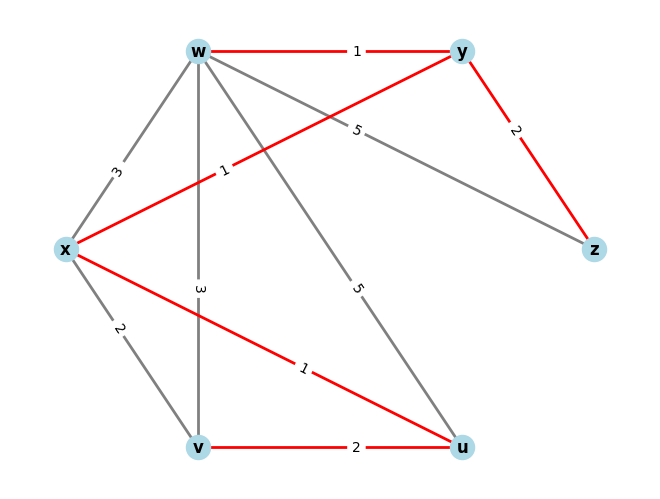

In [63]:
drawGraph(V, S, w)